In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**DATA DESCRIPTION**

1. sl_no ----> Serial Number
2. gender ---> Gender- Male='M',Female='F'
3. ssc_p ---> Secondary Education percentage- 10th Grade
4. ssc_b ---> Board of Education- Central/ Others
5. hsc_p ---> Higher Secondary Education percentage- 12th Grade
6. hsc_b ---> Board of Education- Central/ Others
7. hsc_s ---> Specialization in Higher Secondary Education
8. degree_p ---> Degree Percentage
9. degree_t ---> Under Graduation(Degree type)- Field of degree education
10. workex ---> Work Experience
11. etest_p ---> Employability test percentage ( conducted by college)
12. specialisation ---> Post Graduation(MBA)- Specialization
13. mba_p ---> MBA percentage
14. status ---> Status of placement- Placed/Not placed
15. salary ---> Salary offered by corporate to candidates

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [ ]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

# Data Visualization

In [ ]:
df_deg = df.degree_t.value_counts()

trace = go.Bar(
    x=df_deg.index,
    y=df_deg.values,
    marker=dict(
        color = df_deg.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Field of degree education', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
df_deg = df.hsc_s.value_counts()

trace = go.Bar(
    x=df_deg.index,
    y=df_deg.values,
    marker=dict(
        color = df_deg.values,
        colorscale='electric',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Specialization in Higher Secondary Education', 
    yaxis = dict(title = '# of Students')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

* **In higher education, students mostly preferred commerce and science instead of arts degree**

In [ ]:
types = df['gender'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['gender'], 
               pull=[0.1, 0], marker=dict(colors=["blue", "pink"]),
               title="Genders")
fig = go.Figure([trace])
fig.show()

* **Our dataset contains almost 3 male for every 2 female students**

In [ ]:
types = df['specialisation'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['specialisation'], 
               pull=[0.1, 0], marker=dict(colors=["#BC08A6", "32BCA1"]),
               title="specialisation")
fig = go.Figure([trace])
fig.show()

*** Even though numbers are close to each other, there are more students choose to specialize in Marketing & Finance**

In [ ]:
types = df['workex'].value_counts().reset_index()

trace = go.Pie(labels=types['index'], values=types['workex'], 
               pull=[0.1, 0], marker=dict(colors=["#4992EB", "#CCEB31"]),
               title="Work Experience")
fig = go.Figure([trace])
fig.show()

* Higher percentage of students does not have any prior work experience

In [ ]:
sns.catplot(
    data=df, kind="bar",
    x="status", y="etest_p", hue="gender",
    ci="sd", palette="Set2", alpha=.6, height=6)


* Placed: Male's have higher employability test percentage
* Not Placed: Female's have higher employability test percentage

In [ ]:
sns.histplot(data=df, x="hsc_p" , kde=True)

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='ssc_p', y='degree_p', hue='gender')
plt.show()

In [ ]:
sns.boxplot(x='gender', y='salary', hue='hsc_s', data=df, palette=['blue', 'green', 'red'])

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
print('Categorical Variables are: \n',df.select_dtypes(include=['object']).columns.tolist())

In [ ]:
print('Numerical Variables are: \n', df.select_dtypes(exclude=['object']).columns.tolist())

In [ ]:
df.drop(['sl_no','salary'], axis=1 , inplace=True)

In [ ]:
categorical_var =  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for var in categorical_var:
    print(df[var].unique())

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['status'] = le.fit_transform(df['status'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
#le.fit_transform(df['workex'])
df.head()

In [ ]:
ohe = OneHotEncoder()
df['hsc_s'] = pd.Categorical(df['hsc_s'])
dfDummies_hsc_s = pd.get_dummies(df['hsc_s'], prefix = 'hsc_s_ohe')
dfDummies_hsc_s

print("********************************")

df['degree_t'] = pd.Categorical(df['degree_t'])
dfDummies_degree_t = pd.get_dummies(df['degree_t'], prefix = 'degree_t_ohe')
dfDummies_degree_t

In [ ]:
df.drop("hsc_s", axis=1, inplace=True)
df.drop("degree_t", axis=1, inplace=True)

df = pd.concat([df, dfDummies_hsc_s], axis=1)
df = pd.concat([df, dfDummies_degree_t], axis=1)
df.head()

In [ ]:
scaled = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [ ]:
ss = StandardScaler()
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
scaled = ss.fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

In [ ]:
y = df["status"]
X = df.drop(['status'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predicted = decision_tree.predict(X_test)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predicted)
decision_tree_acc_score = accuracy_score(y_test,decision_tree_predicted)
print("confussion matrix")
print(decision_tree_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",decision_tree_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,decision_tree_predicted))

In [ ]:
sns.heatmap(decision_tree_conf_matrix, annot=True, cmap="gist_heat")

# Hyper-parameter Optimization

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,14), 
              'min_samples_split': range(2,10), 
              'min_samples_leaf': range(1,3),
             'max_features': ['auto', 'sqrt', 'log2'],
             }

gcv = GridSearchCV(decision_tree, parameters, cv=10).fit(X_train, y_train)
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Source : https://www.kaggle.com/barisscal/heart-disease-dtclassifier-evaluation-metrics#Decision-Tree

In [ ]:
params = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': range(1,14), 
              'min_samples_split': range(2,8), 
              'min_samples_leaf': range(1,3),
             'max_features': ['auto', 'sqrt', 'log2'],
             }

randomizedcv = RandomizedSearchCV(decision_tree, params, n_iter=1000, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)

print(f'RandomizedSearchCV Best Score: {randomizedcv.best_score_*100}')
print(f'RandomizedSearchCV Best Estimator: {randomizedcv.best_estimator_}')
print(f'RandomizedSearchCV Best Params: {randomizedcv.best_params_}')

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation',
       'hsc_s_ohe_Arts', 'hsc_s_ohe_Commerce', 'hsc_s_ohe_Science',
       'degree_t_ohe_Comm&Mgmt', 'degree_t_ohe_Others',
       'degree_t_ohe_Sci&Tech', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p',
       'mba_p'], 'Importance': decision_tree.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Feature Importance for DecisionTreeClassifier")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['r', 'g', 'b', 'c', 'm', 'y', 'k'])
plt.show()

# Conclusion

* GridSearchCV gave me better results than RandomizedSearchCV
* ssc_p seen as the most important feature
* We achieve 88% accuracy on DecisionTreeClassifier

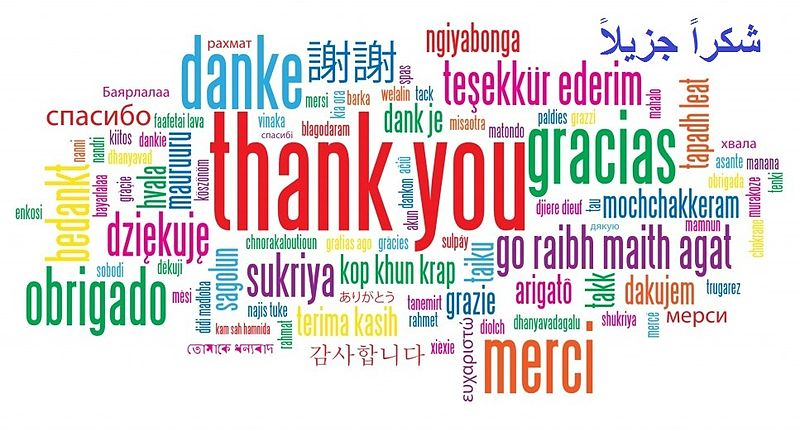

**Thank you for visiting my kernel. !**

**Feel free to comment anything you want**
